In [ ]:
from utils import set_up_altair, convert_to_numeric, handling_problematic_data, read_json_to_df, format_time_columns,calculating_other_agencies, determine_next_day
# aggregate_by_year_month, filter_by_year
from statsmodels.tsa.seasonal import STL as STL
import pandas as pd
import altair as alt
from altair import datum
import seaborn as sns
import matplotlib.pyplot as plt
set_up_altair()


PATH = "../../data/all_incidents.json"

In [ ]:
# staff to victim ratio count.

In [2]:
data = read_json_to_df(PATH)
data = format_time_columns(data)
data = convert_to_numeric(data)
data = handling_problematic_data(data)
data = calculating_other_agencies(data)
data = determine_next_day(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1409
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1208 non-null   object        
 1   date            1208 non-null   datetime64[ns]
 2   Incident        1208 non-null   object        
 3   Type            1208 non-null   object        
 4   Location        1208 non-null   object        
 5   Weather         831 non-null    object        
 6   Tagged          443 non-null    object        
 7   Incident_Type   1208 non-null   object        
 8   Incident_Cause  1208 non-null   object        
 9   url             1208 non-null   object        
 10  main_text       1208 non-null   object        
 11  rescue_info     1208 non-null   object        
 12  start_time      1208 non-null   object        
 13  end_time        1208 non-null   object        
 14  hrs             1208 non-null   float64       
 15  staff    

In [6]:
alt.Chart(data).mark_bar().encode(
    alt.Color('Incident_Cause:N'),
    alt.X('next_day'),
    alt.Y('count():Q')
)

alt.Chart(...)

In [3]:
data.head()

title       date     Incident  \
0  Lingmell Gill Path, Scafell Pike – Tue 4th Nov... 2025-11-04  145 in 2025   
1        Pikes Crag, Scafell Pike – Sun 2nd Nov 2025 2025-11-02  144 in 2025   
2    Broadcrag Tarn, Scafell Pike – Sun 2nd Nov 2025 2025-11-02  143 in 2025   
3             Green How, Scafell – Fri 31st Oct 2025 2025-10-31  142 in 2025   
4     Lingmell Col, Scafell Pike – Thu 30th Oct 2025 2025-10-30  141 in 2025   

                        Type                          Location  \
0              Alert — Other  Lingmell Gill Path, Scafell Pike   
1               Alert — Lost          Pikes Crag, Scafell Pike   
2     Limited Callout — Lost      Broadcrag Tarn, Scafell Pike   
3  Limited Callout — Overdue                Green How, Scafell   
4               Alert — Lost        Lingmell Col, Scafell Pike   

                        Weather                   Tagged    Incident_Type  \
0                  [Cold, Rain]            [False Alarm]            Alert   
1  [Cloudy Summits, Cold, Mist]                   [Lost]            Alert   
2  [Cloudy Summits, Cold, Mist]  [Lost, Party Separated]  Limited Callout   
3           [Cold, Rain, Windy]          [Lost, Overdue]  Limited Callout   
4         [Cold, Drizzle, Mist]                   [Lost]            Alert   

  Incident_Cause                                                url  ...  \
0          Other  https://www.wmrt.org.uk/incidents/lingmell-gil...  ...   
1           Lost  https://www.wmrt.org.uk/incidents/pikes-crag-s...  ...   
2           Lost  https://www.wmrt.org.uk/incidents/broad-crag-s...  ...   
3        Overdue  https://www.wmrt.org.uk/incidents/green-how-sc...  ...   
4           Lost  https://www.wmrt.org.uk/incidents/lingmell-col...  ...   

  total_hrs    Other Agencies Diagnosis  year  month  year_month  \
0       0.4               NaN       NaN  2025     11  2025-11-01   
1       2.8  [Cumbria Police]       NaN  2025     11  2025-11-01   
2      39.0  [Cumbria Police]       NaN  2025     11  2025-11-01   
3       8.0  [Cumbria Police]       NaN  2025     10  2025-10-01   
4       0.3  [Cumbria Police]       NaN  2025     10  2025-10-01   

  Agencies_count      start_time_obj        end_time_obj next_day  
0              0 1900-01-01 12:47:00 1900-01-01 13:00:00    False  
1              1 1900-01-01 21:36:00 1900-01-01 22:58:00    False  
2              1 1900-01-01 16:18:00 1900-01-01 21:53:00    False  
3              1 1900-01-01 16:30:00 1900-01-01 17:41:00    False  
4              1 1900-01-01 16:16:00 1900-01-01 16:32:00    False  

[5 rows x 27 columns]

In [4]:
data.next_day.value_counts()

next_day
False    1007
True      201
Name: count, dtype: int64

In [4]:
data.columns

Index(['title', 'date', 'Incident', 'Type', 'Location', 'Weather', 'Tagged',
       'Incident_Type', 'Incident_Cause', 'url', 'main_text', 'rescue_info',
       'start_time', 'end_time', 'hrs', 'staff', 'location', 'total_hrs',
       'Other Agencies', 'Diagnosis', 'year', 'month', 'year_month',
       'Agencies_count'],
      dtype='object')

In [9]:
data.Diagnosis.describe()

count              428
unique              34
top       Ankle Injury
freq               113
Name: Diagnosis, dtype: object

In [4]:
data['Incident_Cause'].value_counts()        

Incident_Cause
Injured & Medical    505
Lost                 391
Overdue              248
Other                155
Cragfast             111
Name: count, dtype: int64

<Axes: >

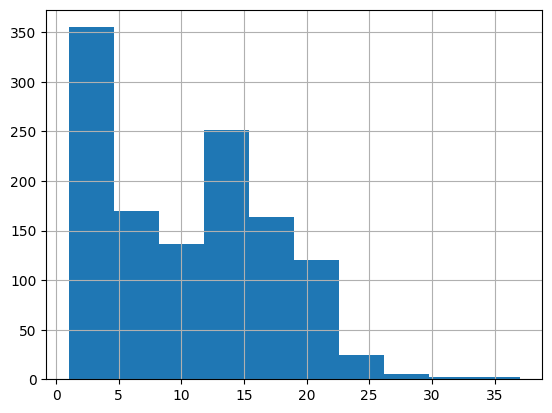

In [4]:
data['staff'].hist()

<Axes: >

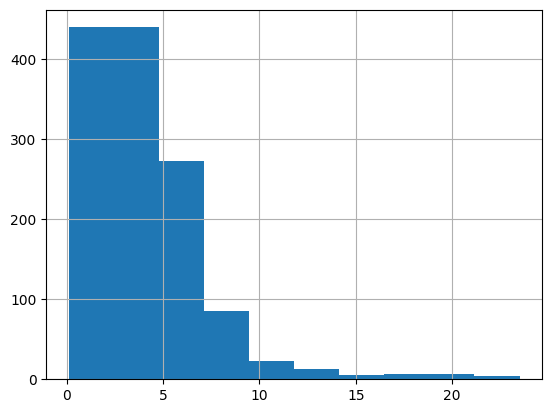

In [5]:
data['hrs'].hist()

<Axes: >

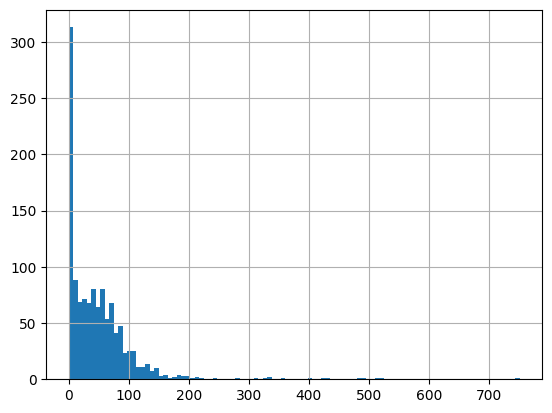

In [6]:
data['total_hrs'].hist(bins=100)

In [9]:
data.Incident_Cause.value_counts()

Incident_Cause
Injured & Medical    505
Lost                 391
Overdue              248
Other                155
Cragfast             111
Name: count, dtype: int64

In [10]:
data.groupby('Incident_Cause')['hrs'].agg(['mean', 'median', 'sum', 'std','count'])

mean  median     sum       std  count
Incident_Cause                                              
Cragfast           5.097248     4.5   555.6  3.490794    109
Injured & Medical  3.947976     3.7  1950.3  2.297504    494
Lost               4.255432     3.6  1527.7  3.113041    359
Other              3.626667     2.7   489.6  3.813667    135
Overdue            3.141709     1.4   625.2  4.238248    199

In [11]:
data.groupby('Incident_Cause')['staff'].agg(['mean', 'median', 'sum', 'std','count'])

mean  median     sum       std  count
Incident_Cause                                               
Cragfast           12.405660    13.0  1315.0  6.084764    106
Injured & Medical  13.758197    15.0  6714.0  5.712386    488
Lost                7.237500     6.0  2316.0  6.176594    320
Other               7.617021     6.0  1074.0  6.707841    141
Overdue             6.632184     2.0  1154.0  7.431560    174

In [18]:
chart = alt.Chart(data).mark_point().encode(
    alt.X('hrs'),
    alt.Y('staff'),
    alt.Color('Incident_Cause'),
    alt.Shape('Incident_Type')
)

In [19]:
chart.show()

alt.Chart(...)

In [ ]:
url_callout = data['Incident_Type'].value_counts()

Incident_Type
Full Callout       685
Alert              500
Limited Callout    211
Callout              8
                     6
Name: count, dtype: int64

In [16]:
data.groupby('Incident_Type')[['staff','hrs']].agg(['mean', 'median', 'sum', 'std','count'])

staff                                       hrs         \
                      mean median      sum       std count      mean median   
Incident_Type                                                                 
                  9.000000    9.0     54.0  6.387488     6  3.650000   3.25   
Alert             1.815476    1.0    610.0  2.083739   336  2.218382   1.40   
Callout          12.166667   12.5     73.0  8.232051     6  4.120000   4.20   
Full Callout     15.154532   15.0  10199.0  4.681830   673  4.834724   4.20   
Limited Callout   7.870192    7.0   1637.0  3.427295   208  4.644175   4.20   

                                         
                    sum       std count  
Incident_Type                            
                   21.9  2.294995     6  
Alert             905.1  2.536017   408  
Callout            20.6  2.308029     5  
Full Callout     3244.1  3.180266   671  
Limited Callout   956.7  3.063672   206

In [7]:
data.groupby('Incident_Type')[['staff','hrs']].agg(['min', 'max'])

staff        hrs      
                  min   max  min   max
Incident_Type                         
                  1.0  18.0  1.0   6.9
Alert             1.0  25.0  0.1  20.0
Full Callout      2.0  37.0  0.3  23.5
Limited Callout   1.0  22.0  0.1  23.0

In [15]:
data[['hrs', 'staff']][data.Incident_Type == 'Callout']

hrs  staff
788   7.3    2.0
922   1.0   14.0
1041  3.2   19.0
1093  4.9    4.0
1117  NaN    NaN
1118  NaN    NaN
1293  NaN   23.0
1406  4.2   11.0

In [9]:
alt.Chart(data).mark_point().encode(
    alt.X('hrs'),
    alt.Y('Agencies_count'),
    alt.Color('Incident_Cause')
).show()

alt.Chart(...)

In [17]:
alt.Chart(data).mark_point().encode(
    alt.X('hrs'),
    alt.Y('staff'),
    alt.Color('Incident_Type')
).show()

alt.Chart(...)

In [21]:
pd.crosstab(data['Incident_Type'], data['Incident_Cause'])

Incident_Cause   Cragfast  Injured & Medical  Lost  Other  Overdue
Incident_Type                                                     
                        0                  3     1      1        1
Alert                  16                 58   180     71      175
Callout                 0                  3     0      5        0
Full Callout           70                419    93     44       59
Limited Callout        25                 22   117     34       13

In [23]:
pd.crosstab(data['Incident_Type'], data['Incident_Cause'],values=data['staff'],aggfunc='mean')

Incident_Cause    Cragfast  Injured & Medical       Lost      Other    Overdue
Incident_Type                                                                 
                       NaN          14.333333   6.000000   1.000000   4.000000
Alert             1.181818           2.000000   1.619469   1.881356   1.971429
Callout                NaN          10.500000        NaN  13.000000        NaN
Full Callout     15.328571          15.429952  13.900000  14.795455  15.200000
Limited Callout   9.160000           7.904762   7.551724   7.848485   8.230769

In [24]:
pd.crosstab(data['Incident_Type'], data['Incident_Cause'],values=data['hrs'],aggfunc='mean')

Incident_Cause   Cragfast  Injured & Medical      Lost     Other   Overdue
Incident_Type                                                             
                      NaN           4.466667  5.800000  1.000000  1.700000
Alert            1.371429           2.018519  2.876821  2.662069  1.435878
Callout               NaN           5.250000       NaN  3.366667       NaN
Full Callout     5.841429           4.262560  5.783516  3.780488  7.076364
Limited Callout  5.100000           2.509524  4.837931  5.284375  3.850000

In [ ]:
alt.Chart(data).mark_rect().encode(
    alt.X('Incident_Type'),
    alt.Y('Incident_Cause'),
    alt.Color('count()')
)

alt.Chart(...)

In [25]:
alt.Chart(data).mark_bar().encode(
    alt.X('Incident_Type'),
    alt.Y('count()'),
    alt.Color('Incident_Cause')
)

alt.Chart(...)

In [17]:
data.sort_values(by = ['staff','date'], ascending=[True, False], na_position = 'last')


title       date     Incident  \
4     Lingmell Col, Scafell Pike – Thu 30th Oct 2025 2025-10-30  141 in 2025   
7                   Scafell Pike – Sat 18th Oct 2025 2025-10-18  138 in 2025   
8        Kirkfell Nose, Kirkfell – Thu 16th Oct 2025 2025-10-16  137 in 2025   
9                     Great Gable – Thu 2nd Oct 2025 2025-10-02  136 in 2025   
10       Gavel Neese, Great Gable – Thu 2nd Oct 2025 2025-10-02  135 in 2025   
...                                              ...        ...          ...   
1394                Scafell Pike – Sat 28th Mar 2015 2015-03-28   15 in 2015   
1397                Scafell Pike – Tue 24th Mar 2015 2015-03-24   13 in 2015   
1400    Piers Gill, Scafell Pike – Tue 17th Feb 2015 2015-02-17    9 in 2015   
1402                      Wasdale – Sat 7th Feb 2015 2015-02-07    7 in 2015   
1403                 Scafell Pike – Fri 6th Feb 2015 2015-02-06    6 in 2015   

                  Type                    Location  \
4         Alert — Lost  Lingmell Col, Scafell Pike   
7      Alert — Overdue                Scafell Pike   
8     Alert — Cragfast     Kirkfell Nose, Kirkfell   
9      Alert — Overdue                 Great Gable   
10        Alert — Lost    Gavel Neese, Great Gable   
...                ...                         ...   
1394      Alert — Lost                Scafell Pike   
1397   Alert — Overdue                Scafell Pike   
1400      Alert — Lost    Piers Gill, Scafell Pike   
1402   Alert — Overdue                     Wasdale   
1403   Alert — Overdue                Scafell Pike   

                          Weather             Tagged Incident_Type  \
4           [Cold, Drizzle, Mist]             [Lost]         Alert   
7                [Cloudy Summits]  [Party Separated]         Alert   
8                [Cloudy Summits]         [Cragfast]         Alert   
9     [Cloudy Summits, Cool, Dry]          [Overdue]         Alert   
10    [Cloudy Summits, Cool, Dry]             [Lost]         Alert   
...                           ...                ...           ...   
1394                          NaN                NaN         Alert   
1397                          NaN                NaN         Alert   
1400                          NaN                NaN         Alert   
1402                          NaN                NaN         Alert   
1403                          NaN                NaN         Alert   

     Incident_Cause                                                url  ...  \
4              Lost  https://www.wmrt.org.uk/incidents/lingmell-col...  ...   
7           Overdue  https://www.wmrt.org.uk/incidents/scafell-pike...  ...   
8          Cragfast  https://www.wmrt.org.uk/incidents/kirkfell-nos...  ...   
9           Overdue  https://www.wmrt.org.uk/incidents/great-gable-...  ...   
10             Lost  https://www.wmrt.org.uk/incidents/gavel-neese-...  ...   
...             ...                                                ...  ...   
1394           Lost  https://www.wmrt.org.uk/incidents/scafell-pike...  ...   
1397        Overdue  https://www.wmrt.org.uk/incidents/scafell-pike...  ...   
1400           Lost  https://www.wmrt.org.uk/incidents/piers-gill-s...  ...   
1402        Overdue  https://www.wmrt.org.uk/incidents/wasdale-sat-...  ...   
1403        Overdue  https://www.wmrt.org.uk/incidents/scafell-pike...  ...   

     end_time  hrs staff        location total_hrs    Other Agencies  \
4       16:32  0.3     1       NY 216077       0.3  [Cumbria Police]   
7       16:09  0.3     1  NY 14889 04935       0.3  [Cumbria Police]   
8       12:47  0.8     1  NY 19188 10096       0.8  [Cumbria Police]   
9       16:44  0.2     1       NY 213104       0.2  [Cumbria Police]   
10      04:03  2.4     1       NY 200093       2.4  [Cumbria Police]   
...       ...  ...   ...             ...       ...               ...   
1394      NaN  NaN   NaN             NaN       NaN               NaN   
1397    22:11  0.2   NaN             NaN       NaN               NaN   

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1410 non-null   object        
 1   date            1410 non-null   datetime64[ns]
 2   Incident        1410 non-null   object        
 3   Type            1410 non-null   object        
 4   Location        1410 non-null   object        
 5   Weather         866 non-null    object        
 6   Tagged          461 non-null    object        
 7   Incident_Type   1410 non-null   object        
 8   Incident_Cause  1410 non-null   object        
 9   url             1410 non-null   object        
 10  main_text       1410 non-null   object        
 11  rescue_info     1410 non-null   object        
 12  start_time      1403 non-null   object        
 13  end_time        1296 non-null   object        
 14  hrs             1296 non-null   object        
 15  staf

In [23]:
data = data[data.year>2014]
data.describe()

date         year        month  \
count                           1409  1409.000000  1409.000000   
mean   2020-11-16 14:31:46.032647168  2020.357700     6.760114   
min              2015-01-01 00:00:00  2015.000000     1.000000   
25%              2017-10-07 00:00:00  2017.000000     5.000000   
50%              2021-06-28 00:00:00  2021.000000     7.000000   
75%              2023-08-29 00:00:00  2023.000000     9.000000   
max              2025-11-04 00:00:00  2025.000000    12.000000   
std                              NaN     3.251935     2.832557   

                          year_month  
count                           1409  
mean   2020-11-01 13:23:17.586941184  
min              2015-01-01 00:00:00  
25%              2017-10-01 00:00:00  
50%              2021-06-01 00:00:00  
75%              2023-08-01 00:00:00  
max              2025-11-01 00:00:00  
std                              NaN

In [31]:
data[(data['year']>2014) | (data['month']<5)]

title       date  \
0     Lingmell Gill Path, Scafell Pike – Tue 4th Nov... 2025-11-04   
1           Pikes Crag, Scafell Pike – Sun 2nd Nov 2025 2025-11-02   
2       Broadcrag Tarn, Scafell Pike – Sun 2nd Nov 2025 2025-11-02   
3                Green How, Scafell – Fri 31st Oct 2025 2025-10-31   
4        Lingmell Col, Scafell Pike – Thu 30th Oct 2025 2025-10-30   
...                                                 ...        ...   
1404   Corridor Route, Scafell Pike – Sun 25th Jan 2015 2015-01-25   
1405                      Whitehaven – Fri 9th Jan 2015 2015-01-09   
1406                      Whitehaven – Wed 7th Jan 2015 2015-01-07   
1407                   Upper Eskdale – Tue 6th Jan 2015 2015-01-06   
1408                    Scafell Pike – Thu 1st Jan 2015 2015-01-01   

         Incident                              Type  \
0     145 in 2025                     Alert — Other   
1     144 in 2025                      Alert — Lost   
2     143 in 2025            Limited Callout — Lost   
3     142 in 2025         Limited Callout — Overdue   
4     141 in 2025                      Alert — Lost   
...           ...                               ...   
1404    5 in 2015  Full Callout — Injured & Medical   
1405    4 in 2015              Full Callout — Other   
1406    3 in 2015                   Callout — Other   
1407    2 in 2015            Limited Callout — Lost   
1408    1 in 2015            Full Callout — Overdue   

                              Location                       Weather  \
0     Lingmell Gill Path, Scafell Pike                  [Cold, Rain]   
1             Pikes Crag, Scafell Pike  [Cloudy Summits, Cold, Mist]   
2         Broadcrag Tarn, Scafell Pike  [Cloudy Summits, Cold, Mist]   
3                   Green How, Scafell           [Cold, Rain, Windy]   
4           Lingmell Col, Scafell Pike         [Cold, Drizzle, Mist]   
...                                ...                           ...   
1404      Corridor Route, Scafell Pike                           NaN   
1405                        Whitehaven                           NaN   
1406                        Whitehaven                           NaN   
1407                     Upper Eskdale                           NaN   
1408                      Scafell Pike                           NaN   

                       Tagged    Incident_Type     Incident_Cause  \
0               [False Alarm]            Alert              Other   
1                      [Lost]            Alert               Lost   
2     [Lost, Party Separated]  Limited Callout               Lost   
3             [Lost, Overdue]  Limited Callout            Overdue   
4                      [Lost]            Alert               Lost   
...                       ...              ...                ...   
1404                      NaN     Full Callout  Injured & Medical   
1405                      NaN     Full Callout              Other   
1406                      NaN          Callout              Other   
1407                      NaN  Limited Callout               Lost   
1408                      NaN     Full Callout            Overdue   

                                                    url  ... end_time  hrs  \
0     https://www.wmrt.org.uk/incidents/lingmell-gil...  ...    13:00  0.2   
1     https://www.wmrt.org.uk/incidents/pikes-crag-s...  ...    22:58  1.4   
2     https://www.wmrt.org.uk/incidents/broad-crag-s...  ...    21:53  5.6   
3     https://www.wmrt.org.uk/incidents/green-how-sc...  ...    17:41  1.2   
4     https://www.wmrt.org.uk/incidents/lingmell-col...  ...    16:32  0.3   
...                                                 ...  ...      ...  ...   
1404  https://www.wmrt.org.uk/incidents/corridor-rou...  ...    23:00  5.5   
1405  https://www.wmrt.org.uk/incidents/whitehaven-f...  ...    16:00    6   
1406  https://www.wmrt.org.uk/incidents/whitehaven-w...  ...    17:30  4.2   
1407  https://www.wmrt.org.uk/incidents/upper-eskdal...  ...    21:00  4.2

In [9]:
data.Weather.head()

0                    [Cold, Rain]
1    [Cloudy Summits, Cold, Mist]
2    [Cloudy Summits, Cold, Mist]
3             [Cold, Rain, Windy]
4           [Cold, Drizzle, Mist]
Name: Weather, dtype: object

In [10]:
series_of_list = data['Weather']


In [28]:
set_a = {'apple', 'banana'}
set_b = {'banana', 'apple'}

In [29]:
set_a == set_b

True

In [ ]:
index_list = []
item_list = []  
network_list = []

for index, value in series_of_list.items():
    if isinstance(value, list):
        for idx, item in enumerate(value):
            index_list.append(index)
            item_list.append(item)
            if idx == 0:
                temporary_set = {item}
            if idx

        
    else:
        index_list.append(index)
        item_list.append(value)


In [19]:
weather_df = pd.DataFrame({'weather': item_list},index=index_list)

In [30]:
weather_df.head()

weather
0            Cold
0            Rain
1  Cloudy Summits
1            Cold
1            Mist

In [22]:
weather_df.weather.value_counts()

weather
Dry               240
Rain              201
Cloudy Summits    180
Sunny             162
Cold              153
Mist              150
Clear             128
Windy             108
Cool               98
Warm               95
Fine               41
Showers            35
Low Cloud          32
Hot                29
Mild               28
Snow               25
Hill Fog           23
Drizzle            15
Ice                 8
Dark                6
Storms              5
Gales               5
Overcast            3
Sleet / Hail        2
Name: count, dtype: int64

In [23]:
incident_weather = pd.merge(data['Incident_Cause'], weather_df, left_index=True, right_index=True)

In [ ]:
indata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1409
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1208 non-null   object        
 1   date            1208 non-null   datetime64[ns]
 2   Incident        1208 non-null   object        
 3   Type            1208 non-null   object        
 4   Location        1208 non-null   object        
 5   Weather         831 non-null    object        
 6   Tagged          443 non-null    object        
 7   Incident_Type   1208 non-null   object        
 8   Incident_Cause  1208 non-null   object        
 9   url             1208 non-null   object        
 10  main_text       1208 non-null   object        
 11  rescue_info     1208 non-null   object        
 12  start_time      1208 non-null   object        
 13  end_time        1208 non-null   object        
 14  hrs             1208 non-null   float64       
 15  staff    

In [27]:
alt.Chart(incident_weather).mark_bar().encode(
    alt.X('weather'),
    alt.Y('count()'),
    alt.Color('Incident_Cause')
)

alt.Chart(...)

In [16]:
def calculating_items_in_list(data, column_name):
    series_of_list = data[column_name]
    counter = 0
    for list_item in series_of_list:
        if list_item is not None:
            counter += len(list_item)
    return counter

In [17]:
print(calculating_items_in_list(data, 'Weather'))

TypeError: object of type 'float' has no len()

In [ ]:
data.month.quantile([0.25, 0.5, 0.75])
# mean, skew, max, min, median, std, var, quantile

0.25    5.0
0.50    7.0
0.75    9.0
Name: month, dtype: float64

<Axes: xlabel='Incident_Type'>

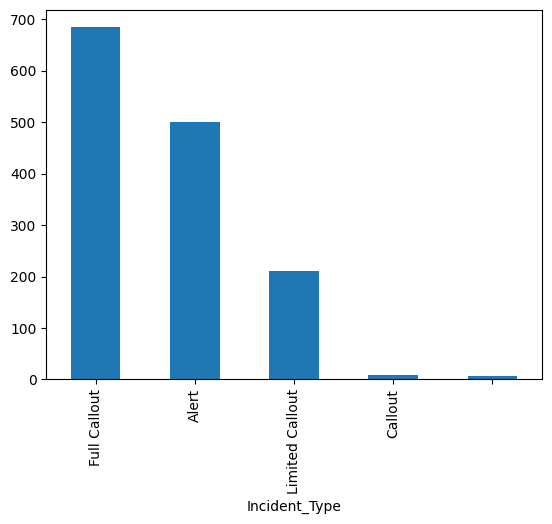

In [45]:
data.Incident_Type.value_counts().to_frame()
data.Incident_Type.value_counts().plot(kind='bar')

<Axes: xlabel='month', ylabel='year'>

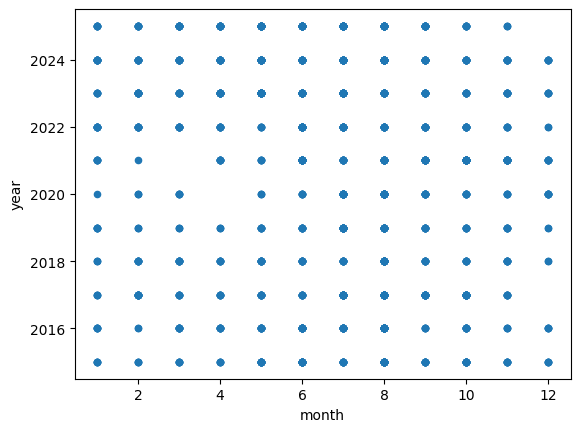

In [46]:
data.plot(kind='scatter', x='month', y='year')

<Axes: >

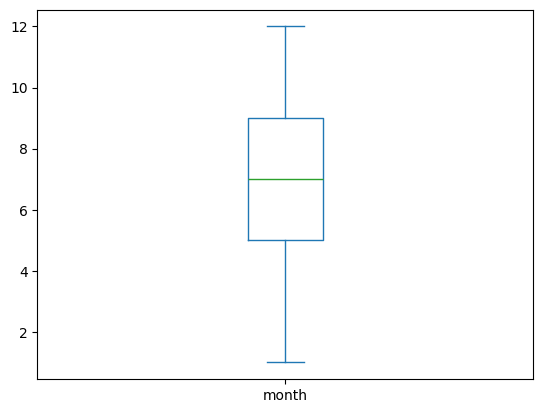

In [47]:
data.plot(kind='box',x='year')

<Axes: xlabel='month', ylabel='year'>

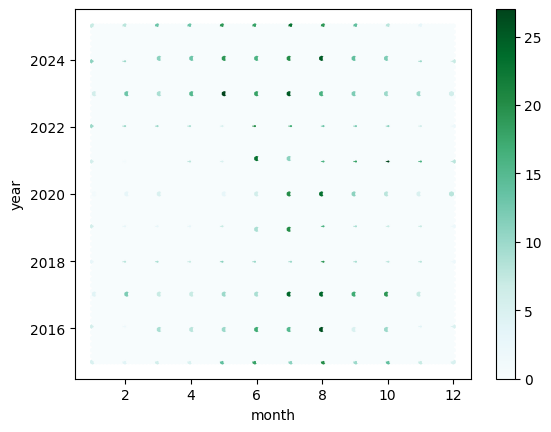

In [49]:
data.plot(kind='hexbin', x='month', y='year')

In [ ]:
data[['year','month']].corr()

year     month
year   1.000000 -0.083511
month -0.083511  1.000000

In [59]:
data.groupby(['Incident_Cause','Incident_Type'])['month'].mean().to_frame()

month
Incident_Cause    Incident_Type            
Cragfast          Alert            7.562500
                  Full Callout     6.371429
                  Limited Callout  6.720000
Injured & Medical                  6.000000
                  Alert            6.465517
                  Callout          8.333333
                  Full Callout     6.661098
                  Limited Callout  5.545455
Lost                               5.000000
                  Alert            6.950000
                  Full Callout     6.478261
                  Limited Callout  7.418803
Other                              8.000000
                  Alert            7.295775
                  Callout          6.000000
                  Full Callout     6.931818
                  Limited Callout  6.882353
Overdue                            9.000000
                  Alert            6.531429
                  Full Callout     6.440678
                  Limited Callout  8.615385

In [61]:
data.pivot_table(
    index='year',
    columns='Incident_Cause',
    values='month',
    aggfunc=['sum', 'mean']
)

sum                                           mean  \
Incident_Cause Cragfast Injured & Medical Lost Other Overdue  Cragfast   
year                                                                     
2015                 57               232  254   112     178  8.142857   
2016                 66               216  290    83     128  6.600000   
2017                 41               343  337    84     156  6.833333   
2018                 68               226  176    65     149  8.500000   
2019                 71               179  222    43     127  5.916667   
2020                 74               217  268    52     116  8.222222   
2021                 68               423  351   162     108  8.500000   
2022                 53               296  200   107     116  6.625000   
2023                100               391  211    94     259  5.882353   
2024                 59               484  188   194     162  5.363636   
2025                 78               324  223    99     145  5.200000   

                                                                
Incident_Cause Injured & Medical      Lost     Other   Overdue  
year                                                            
2015                    7.030303  6.864865  8.000000  6.357143  
2016                    6.545455  6.904762  6.384615  6.736842  
2017                    7.145833  7.170213  6.461538  6.000000  
2018                    5.794872  7.040000  7.222222  6.478261  
2019                    6.884615  7.655172  5.375000  7.470588  
2020                    7.482759  8.121212  5.777778  8.923077  
2021                    7.690909  8.357143  7.043478  9.818182  
2022                    5.920000  5.405405  7.642857  7.250000  
2023                    6.015385  6.806452  7.833333  6.166667  
2024                    6.630137  6.064516  7.760000  5.785714  
2025                    6.000000  6.194444  6.600000  5.800000

In [16]:
data.url[data.staff.isna()]

23      https://www.wmrt.org.uk/incidents/dore-head-ye...
143     https://www.wmrt.org.uk/incidents/upper-eskdal...
345     https://www.wmrt.org.uk/incidents/upper-eskdal...
414     https://www.wmrt.org.uk/incidents/gosforth-sat...
420     https://www.wmrt.org.uk/incidents/brown-tongue...
                              ...                        
1394    https://www.wmrt.org.uk/incidents/scafell-pike...
1397    https://www.wmrt.org.uk/incidents/scafell-pike...
1400    https://www.wmrt.org.uk/incidents/piers-gill-s...
1402    https://www.wmrt.org.uk/incidents/wasdale-sat-...
1403    https://www.wmrt.org.uk/incidents/scafell-pike...
Name: url, Length: 181, dtype: object

In [65]:
df=data.staff.value_counts().sort_index().to_frame()

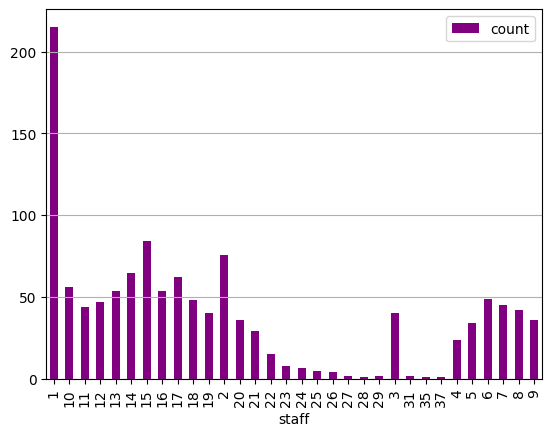

In [69]:
df.plot(kind='bar',color='purple')
plt.grid(axis='y')

In [ ]:
data_stack = data.stack()
data_stack.head(20)

0  title             Lingmell Gill Path, Scafell Pike – Tue 4th Nov...
   date                                            2025-11-04 00:00:00
   Incident                                                145 in 2025
   Type                                                  Alert — Other
   Location                           Lingmell Gill Path, Scafell Pike
   Weather                                                [Cold, Rain]
   Tagged                                                [False Alarm]
   Incident_Type                                                 Alert
   Incident_Cause                                                Other
   url               https://www.wmrt.org.uk/incidents/lingmell-gil...
   main_text         A short alert was quickly resolved after a wal...
   rescue_info        Incident started at 12:47 and ended at 13:00 ...
   start_time                                                    12:47
   end_time                                                      13:00
   hrs

In [75]:
data_unstack = data.unstack()
data_unstack.head(-10)


title       0       Lingmell Gill Path, Scafell Pike – Tue 4th Nov...
            1             Pikes Crag, Scafell Pike – Sun 2nd Nov 2025
            2         Broadcrag Tarn, Scafell Pike – Sun 2nd Nov 2025
            3                  Green How, Scafell – Fri 31st Oct 2025
            4          Lingmell Col, Scafell Pike – Thu 30th Oct 2025
                                          ...                        
year_month  1394                                  2015-03-01 00:00:00
            1395                                  2015-03-01 00:00:00
            1396                                  2015-03-01 00:00:00
            1397                                  2015-03-01 00:00:00
            1398                                  2015-03-01 00:00:00
Length: 32397, dtype: object

In [64]:
import matplotlib.pyplot as plt


In [21]:
data.groupby('Incident_Cause')[['hrs', 'total_hrs',]].agg(['mean', 'median', 'max', 'min','count', ])


hrs                          total_hrs                \
                       mean median   max  min count       mean median    max   
Incident_Cause                                                                 
Cragfast           5.097248    4.5  23.5  0.2   109  69.897170   57.0  423.0   
Injured & Medical  3.947976    3.7  19.4  0.1   494  58.119876   56.0  355.0   
Lost               4.255432    3.6  20.3  0.1   359  39.028165   25.0  751.0   
Other              3.626667    2.7  23.0  0.1   135  30.092537   12.5  205.0   
Overdue            3.141709    1.4  21.5  0.1   199  40.773373    3.4  516.0   

                              
                   min count  
Incident_Cause                
Cragfast           0.3   106  
Injured & Medical  0.2   483  
Lost               0.1   316  
Other              0.1   134  
Overdue            0.1   169

In [104]:
n = df.hrs.count()
xbar = df.hrs.mean()
s = df.hrs.std()
SEM = s/np.sqrt(n)

In [92]:
import scipy.stats as stats

In [105]:
interval = stats.norm.interval(confidence=0.95, loc=xbar, scale=SEM)
interval

(np.float64(3.797549235311492), np.float64(4.1456167878545305))

In [106]:
test_results = stats.ttest_1samp(df['hrs'], popmean = 10)
test_results

TtestResult(statistic=np.float64(-67.89187957774796), pvalue=np.float64(0.0), df=np.int64(1294))

In [107]:
test_results = stats.ttest_ind(df[df['Incident_Type']=='Alert']['hrs'],df[df['Incident_Type']=='Full Callout']['hrs'])
test_results

TtestResult(statistic=np.float64(-14.097618160489736), pvalue=np.float64(1.5310794639134059e-41), df=np.float64(1076.0))

In [108]:
df.groupby('Incident_Type')['hrs'].agg(['mean','count'])

mean  count
Incident_Type                   
                 3.650000      6
Alert            2.218382    408
Callout          4.120000      5
Full Callout     4.834179    670
Limited Callout  4.644175    206

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [17]:
data.reset_index(inplace=True)

In [18]:
data.sort_values(by='date',ascending=True, inplace=True)

In [19]:
data.set_index('date', inplace = True)

In [21]:
data.loc['2025-10-04':'2025-12-31']

title     Incident  \
date                                                                         
2025-10-16        Kirkfell Nose, Kirkfell – Thu 16th Oct 2025  137 in 2025   
2025-10-18                   Scafell Pike – Sat 18th Oct 2025  138 in 2025   
2025-10-19       Piers Gill, Scafell Pike – Sun 19th Oct 2025  139 in 2025   
2025-10-26          Stand Crag, Great End – Sun 26th Oct 2025  140 in 2025   
2025-10-30     Lingmell Col, Scafell Pike – Thu 30th Oct 2025  141 in 2025   
2025-10-31             Green How, Scafell – Fri 31st Oct 2025  142 in 2025   
2025-11-02    Broadcrag Tarn, Scafell Pike – Sun 2nd Nov 2025  143 in 2025   
2025-11-02        Pikes Crag, Scafell Pike – Sun 2nd Nov 2025  144 in 2025   
2025-11-04  Lingmell Gill Path, Scafell Pike – Tue 4th Nov...  145 in 2025   

                                        Type  \
date                                           
2025-10-16                  Alert — Cragfast   
2025-10-18                   Alert — Overdue   
2025-10-19               Full Callout — Lost   
2025-10-26  Full Callout — Injured & Medical   
2025-10-30                      Alert — Lost   
2025-10-31         Limited Callout — Overdue   
2025-11-02            Limited Callout — Lost   
2025-11-02                      Alert — Lost   
2025-11-04                     Alert — Other   

                                    Location                       Weather  \
date                                                                         
2025-10-16           Kirkfell Nose, Kirkfell              [Cloudy Summits]   
2025-10-18                      Scafell Pike              [Cloudy Summits]   
2025-10-19          Piers Gill, Scafell Pike        [Cloudy Summits, Rain]   
2025-10-26             Stand Crag, Great End        [Cloudy Summits, Rain]   
2025-10-30        Lingmell Col, Scafell Pike         [Cold, Drizzle, Mist]   
2025-10-31                Green How, Scafell           [Cold, Rain, Windy]   
2025-11-02      Broadcrag Tarn, Scafell Pike  [Cloudy Summits, Cold, Mist]   
2025-11-02          Pikes Crag, Scafell Pike  [Cloudy Summits, Cold, Mist]   
2025-11-04  Lingmell Gill Path, Scafell Pike                  [Cold, Rain]   

                             Tagged    Incident_Type     Incident_Cause  \
date                                                                      
2025-10-16               [Cragfast]            Alert           Cragfast   
2025-10-18        [Party Separated]            Alert            Overdue   
2025-10-19                   [Lost]     Full Callout               Lost   
2025-10-26                      NaN     Full Callout  Injured & Medical   
2025-10-30                   [Lost]            Alert               Lost   
2025-10-31          [Lost, Overdue]  Limited Callout            Overdue   
2025-11-02  [Lost, Party Separated]  Limited Callout               Lost   
2025-11-02                   [Lost]            Alert               Lost   
2025-11-04            [False Alarm]            Alert              Other   

                                                          url  \
date                                                            
2025-10-16  https://www.wmrt.org.uk/incidents/kirkfell-nos...   
2025-10-18  https://www.wmrt.org.uk/incidents/scafell-pike...   
2025-10-19  https://www.wmrt.org.uk/incidents/piers-gill-s...   
2025-10-26  https://www.wmrt.org.uk/incidents/stand-crag-g...   
2025-10-30  https://www.wmrt.org.uk/incidents/lingmell-col...   
2025-10-31  https://www.wmrt.org.uk/incidents/green-how-sc...   
2025-11-02  https://www.wmrt.org.uk/incidents/broad-crag-s...   
2025-11-02  https://www.wmrt.org.uk/incidents/pikes-crag-s...   
2025-11-04  https://www.wmrt.org.uk/incidents/lingmell-gil...   

                                                    main_text  ... end_time  \
date                                                           ...            
2025-10-16  Cumbria Police contacted the team regarding a ...  ...    12:47   
2025-10-18  The Team Leader wa

In [24]:
data.dropna(subset=['hrs'], inplace=True)

In [26]:
data = data.astype({'hrs':'float'})

<Axes: xlabel='date', ylabel='hrs'>

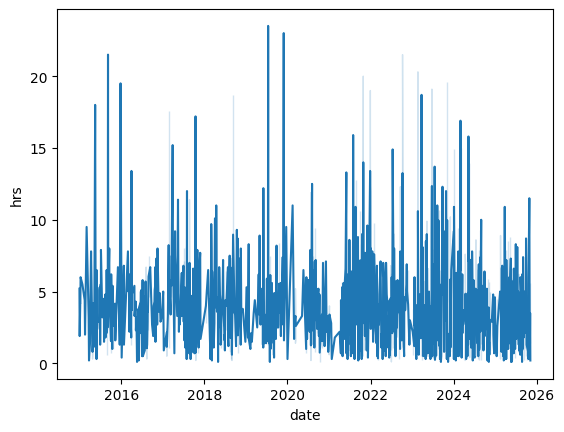

In [27]:
sns.lineplot(data['hrs'])

In [28]:
ma7_mean = data.hrs.rolling(window=7).mean()
ma7_median = data.hrs.rolling(window=7).median()

<Axes: xlabel='date', ylabel='hrs'>

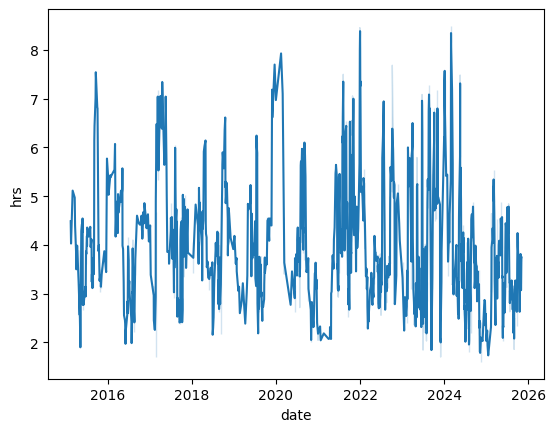

In [29]:
sns.lineplot(ma7_mean)

<Axes: xlabel='date', ylabel='hrs'>

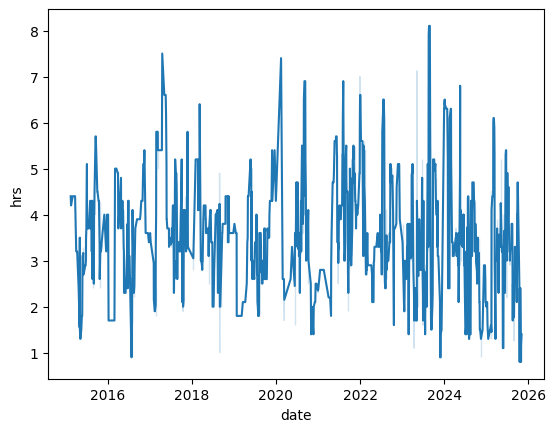

In [30]:
sns.lineplot(ma7_median)

In [32]:
hrs_pct_change = data['hrs'].pct_change()

<Axes: xlabel='date', ylabel='hrs'>

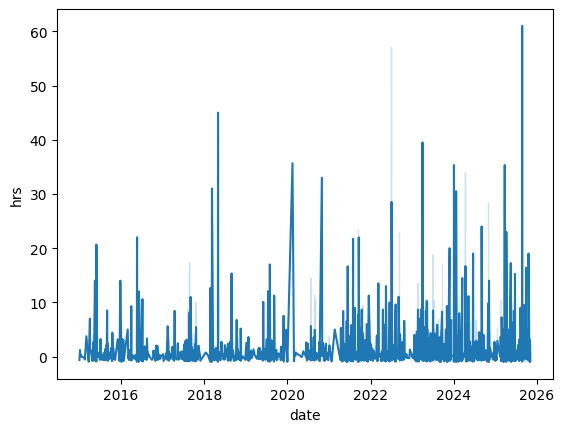

In [33]:
sns.lineplot(hrs_pct_change)

In [34]:
data['season']=data.index.quarter
data.head()

title    Incident  \
date                                                                   
2014-12-30  Piers Gill, Scafell Pike – Tue 30th Dec 2014  95 in 2014   
2015-01-01               Scafell Pike – Thu 1st Jan 2015   1 in 2015   
2015-01-06              Upper Eskdale – Tue 6th Jan 2015   2 in 2015   
2015-01-07                 Whitehaven – Wed 7th Jan 2015   3 in 2015   
2015-01-09                 Whitehaven – Fri 9th Jan 2015   4 in 2015   

                              Type                  Location Weather Tagged  \
date                                                                          
2014-12-30     Full Callout — Lost  Piers Gill, Scafell Pike     NaN    NaN   
2015-01-01  Full Callout — Overdue              Scafell Pike     NaN    NaN   
2015-01-06  Limited Callout — Lost             Upper Eskdale     NaN    NaN   
2015-01-07         Callout — Other                Whitehaven     NaN    NaN   
2015-01-09    Full Callout — Other                Whitehaven     NaN    NaN   

              Incident_Type Incident_Cause  \
date                                         
2014-12-30     Full Callout           Lost   
2015-01-01     Full Callout        Overdue   
2015-01-06  Limited Callout           Lost   
2015-01-07          Callout          Other   
2015-01-09     Full Callout          Other   

                                                          url  \
date                                                            
2014-12-30  https://www.wmrt.org.uk/incidents/piers-gill-s...   
2015-01-01  https://www.wmrt.org.uk/incidents/scafell-pike...   
2015-01-06  https://www.wmrt.org.uk/incidents/upper-eskdal...   
2015-01-07  https://www.wmrt.org.uk/incidents/whitehaven-w...   
2015-01-09  https://www.wmrt.org.uk/incidents/whitehaven-f...   

                                                    main_text  ...  hrs staff  \
date                                                           ...              
2014-12-30  We were called by Police about a family of 4 l...  ...  5.2    15   
2015-01-01  We were called by Cumbria Police about a party...  ...  1.9    20   
2015-01-06  The team was called out to assist two walkers ...  ...  4.2    13   
2015-01-07  The team was called out by Cumbria Police to a...  ...  4.2    11   
2015-01-09  The Team was called out by Cumbria Police on t...  ...  6.0    19   

               location  total_hrs          Other Agencies Diagnosis  year  \
date                                                                         
2014-12-30  NY 211 082          78                     NaN       NaN  2014   
2015-01-01          NaN         38  [Duddon & Furness MRT]       NaN  2015   
2015-01-06  NY 212 040          55                     NaN       NaN  2015   
2015-01-07          NaN         46  [Duddon & Furness MRT]       NaN  2015   
2015-01-09          NaN        114        [Cumbria Police]       NaN  2015   

           month year_month  season  
date                                 
2014-12-30    12 2014-12-01       4  
2015-01-01     1 2015-01-01       1  
2015-01-06     1 2015-01-01       1  
2015-01-07     1 2015-01-01       1  
2015-01-09     1 2015-01-01       1  

[5 rows x 23 columns]

In [36]:
season_hrs_mean = data.groupby('season')['hrs'].mean()

In [39]:
season_hrs_mean.head()

season
1    4.284158
2    3.716715
3    3.900998
4    4.223171
Name: hrs, dtype: float64

In [41]:
trial = data.hrs.resample('Q').mean()

C:\Users\Chua Shi Min\AppData\Local\Temp\ipykernel_26284\3115346812.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  trial = data.hrs.resample('Q').mean()


In [42]:
trial.head()

date
2014-12-31    5.200000
2015-03-31    4.110000
2015-06-30    3.433333
2015-09-30    4.742308
2015-12-31    4.172222
Freq: QE-DEC, Name: hrs, dtype: float64